Importamos librerias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

Cargamos el dataset.

In [2]:
df = pd.read_csv('adult.csv')
df.shape

(32561, 15)

In [3]:
df = df.applymap(lambda x : np.nan if x == "?" else x).dropna()
df.shape

(30162, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [13]:
#print(df.workclass.unique()) 
#['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc','Local-gov' 'Without-pay']

#df.education.unique() 
# ['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate','Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc','1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool']

#df.sort_values("education.num") 
# De 1 - preschool a 16 - Doctorate

#df["marital.status"].unique() 
#'Widowed', 'Divorced', 'Separated', 'Never-married','Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']

df.occupation.unique() # 14 val

#df.race.unique() # 5 val

#df.sex.unique() # 2 val



#df.fnlwgt.unique().shape

#sns.distplot(df.fnlwgt)


#df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
#a_dummies = ["income"]
#columnas_dummies = ["income"]
#df_dummies = pd.get_dummies(df,a_dummies,columns=columnas_dummies)

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

Hacemos cambios en los datos.

In [6]:
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})

df["marital_status_num"] = df["marital.status"].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3,'Married-civ-spouse':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6})

df["occupation_num"] = df["occupation"].map(['Exec-managerial':0, 'Machine-op-inspct', 'Prof-specialty','Other-service', 'Adm-clerical', 'Transport-moving', 'Sales','Craft-repair', 'Farming-fishing', 'Tech-support','Protective-serv', 'Handlers-cleaners', 'Armed-Forces','Priv-house-serv'})

df["sex_num"] = np.where(df.sex == "Male", 0,1) #dos valores

df["income_num"] = np.where(df.income == '<=50K', 0, 1) #dos valores, a una variable dummy 

numerable = ["workclass_num","marital_status_num","occupation_num","sex_num","income_num"]

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,1,0,3770,45,United-States,0
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,0,0,3770,40,United-States,0
7,74,State-gov,88638,16,Never-married,Prof-specialty,Other-relative,White,1,0,3683,20,United-States,1
8,68,Federal-gov,422013,9,Divorced,Prof-specialty,Not-in-family,White,1,0,3683,40,United-States,0
10,45,Private,172274,16,Divorced,Prof-specialty,Unmarried,Black,1,0,3004,35,United-States,1
11,38,Self-emp-not-inc,164526,15,Never-married,Prof-specialty,Not-in-family,White,0,0,2824,45,United-States,1
12,52,Private,129177,13,Widowed,Other-service,Not-in-family,White,1,0,2824,20,United-States,1


In [10]:
Tot = [numerable]

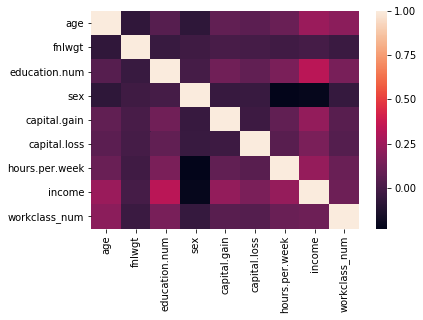

In [11]:
sns.heatmap(df.corr());